## Lecture 3

## Part 1 - Small World Networks

**Reading: Network Science Chapter 3, Section 3.5 - 3.10, with emphasis on 3.8 and 3.9.**

**Exercises 1:**



**1. What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?**

in a random society all individuals are expected to have a comparable number of friends. Hence if people are randomly connected to each other, we lack outliers: There are no highly popular individuals, and no one is left behind, having only a few friends. Indeed, there is extensive evidence of individuals who have considerably more than 1,185 acquaintances. a study of the social network behind Facebook has documented numerous individuals with 5,000 Facebook friends, the maximum allowed by the social networking platform. 


**2. List the four regimes that characterize random networks as a function of ⟨k⟩.**

We can distinguish four topologically distinct regimes, each with its unique characteristics:

**Subcritical Regime:** 0 < ‹k› < 1 (p < 1/N)

**Critical Point:** ‹k› = 1 (p = 1/N)

**Supercritical Regime:** ‹k› > 1 (p > 1/N)

**Connected Regime:** ‹k› > lnN (p > lnN/N )

**3. According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?**

The average clustering coefficient of real networks is much higher than expected for a random network of similar N and L. In a random network the local clustering coefficient is independent of the node’s degree and ‹C› depends on the system size as 1/N. In contrast, measurements indicate that for real networks C(k) decreases with the node degrees and is largely independent of the system size.



**Exercises 2: WS edition.**

* First, let's use networkx to play around with WS graphs. 
* Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0,0.1, and 1. 
* Calculate the average shortest path length ⟨d⟩ for each one. Describe what happens to the network when p=1.


In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

25.062380761523045


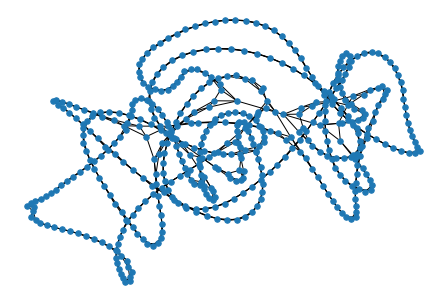

In [30]:
# p=0.01
G = nx.watts_strogatz_graph(500, 4,0.01)
nx.draw(G, node_size = 30)
print(nx.average_shortest_path_length(G))

4.777755511022044


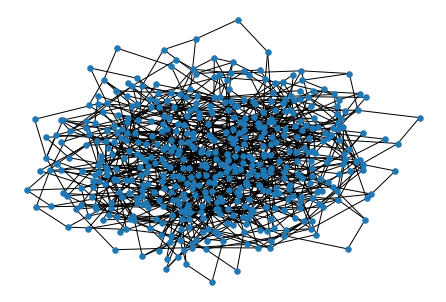

In [36]:
# p=1

G_2 = nx.watts_strogatz_graph(500, 4,1)
nx.draw(G_2, node_size = 30)
print(nx.average_shortest_path_length(G_2))

* Generate a lot of networks with different values of p. You will notice that paths are short when p is close to one and they are long when p=0.
* What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network (i.e. the value you find when  p=1).

In [37]:
G_test = nx.watts_strogatz_graph(500, 4,0.06)
print(nx.average_shortest_path_length(G_test))

9.022941883767535


In [38]:
G_test = nx.watts_strogatz_graph(500, 4,0.5)
print(nx.average_shortest_path_length(G_test))

4.974452905811623


In [39]:
G_test = nx.watts_strogatz_graph(500, 4,0.8)
print(nx.average_shortest_path_length(G_test))

4.779246492985972


* Let's investigate this behavior in detail. Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}. Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).

In [80]:
p_values = [0,0.01,0.03,0.05,0.1,0.2]
std = []
mean = []
samples = 50
for i in p_values:
    shortest_path = []
    for j in range(0, samples):
        G = nx.watts_strogatz_graph(500, 4, i)
        shortest_path.append(nx.average_shortest_path_length(G))
    std.append(np.std(shortest_path))
    mean.append(np.mean(shortest_path))


Text(0, 0.5, 'ave(<d>)')

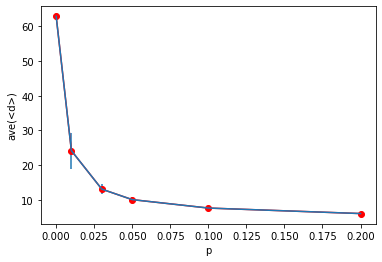

In [82]:
plt.plot(p_values, mean, "-ro")
plt.errorbar(p_values, mean, std)
plt.xlabel("p")
plt.ylabel("ave(<d>)")

## Part 2 - Scale-free networks

**Reading: Now we dig into the extended history and and theory behind Scale-Free networks and the Barabasi-Albert Model.**

* **Chapter 4, Section 4.1 - 4.7.**
* **Chapter 5, section 5.1 - 5.5.**



Exercises 1: BA edition.

**1. What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).**

**Anomalous Regime (γ ≤ 2)** = the number of links connected to the largest hub grows faster than the size of the network. This means that for sufficiently large N the degree of the largest hub must exceed the total number of nodes in the network, hence it will run out of nodes to connect to.For values of γ < 2, the value of 1/(γ-1) is greater than 1. This implies that the largest hub should have a degree greater than N.

**Scale-Free Regime (2 < γ < 3)** = A scale-free network is a network whose degree distribution follows a power law, at least asymptotically. That is, the fraction P(k) of nodes in the network having k connections to other nodes goes for large values of k as. The first moment <k> is finite; whereas the second and higher moments diverge as N->∞.
K max grows with the size of the network with exponent 1/(γ-1) ofvalue less than 1.


**Random Network Regime (γ > 3)** = The first and second moments are finite. For large γ, the degree distribution pk decays sufficiently fast to make the hubs smaller and less numerous (characteristic of random networks): uncharacteristic of real-networks.

**2. What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.**


**Sublinear Regime (0 < α < 1)**=
The degree distribution follows the stretched exponential (5.23), resulting in fewer and smaller hubs than in a scale-free network. As α → 1 the cutoff length increases and pk follows a power law over an increasing range of degrees.

**Linear Regime (α=1)** =
This corresponds to the Barabási-Albert model, hence the degree distribution follows a power law.

**Superlinear Regime (α > 1)** =
The high-degree nodes are disproportionately attractive. A winner-takes-all dynamics leads to a hub-and-spoke topology. In this configuration the earliest nodes become super hubs and all subsequent nodes link to them. The degree distribution, shown for α=1.5 indicates the coexistence of many small nodes with a few super hubs in the vicinity of k=104

Exercises 2: create our own Barabasi-Albert model
* First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).

* Now add another node, connecting one of the existing nodes in proportion to their degree.

* Keep going until you have a 100 node network.
* Hint: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using random.choice) corresponds to selecting a node with probability proportional to it's degree.
* Plot the network.
* Add more nodes until you have a 5000 node network. #er svo lengi að loada

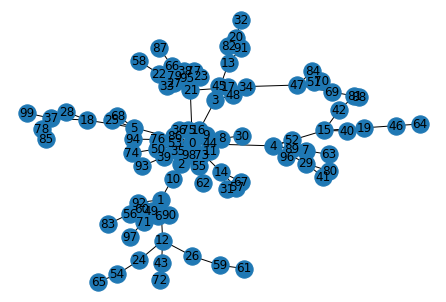

In [101]:
import networkx as nx

G = nx.Graph()
G.add_edge(0,1)
for i in range(2,100):
    flattern_edges = list(sum(G.edges(), ()))
    random_node = np.random.choice(flattern_edges) # til að velja random node úr lista sem við erum komin með
    G.add_edge(i, random_node) # adda inn i + svo eh úr random tölu úr listanum, ríkur verður ríkari, því að þeir koma oftar fyrir

nx.draw(G, with_labels = True)


* What's the maximum and minimum degree? #degree = hversu margar nóður tiltekin nóða er tengd

In [128]:
dict(G.degree()).values()

dict_values([23, 9, 2, 5, 7, 4, 1, 2, 2, 1, 1, 1, 4, 4, 4, 4, 1, 1, 3, 2, 2, 11, 2, 1, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 2, 2, 1, 1, 2, 5, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [130]:
max(dict(G.degree()).values())

23

In [131]:
min(dict(G.degree()).values())

1

* Now, bin the degree distribution using numpy.histogram.
* Plot the distribution. Plot it with both linear and log-log axes.

In [139]:
dist = list(dict(G.degree()).values())
hist, bins = np.histogram(dist, bins=22)

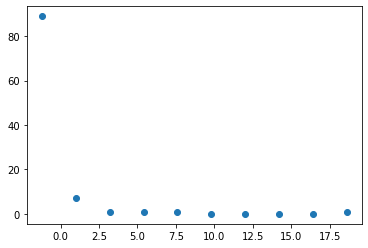

In [144]:
hist, bins = np.histogram(dist)
bins = bins[:-1]
difference = bins[1]-bins[0]
plt.scatter(bins-difference,hist)

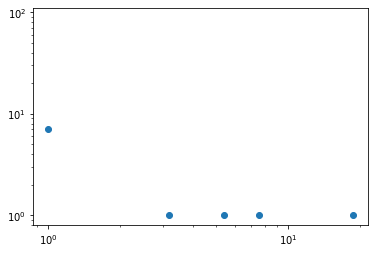

In [143]:
plt.loglog(bins-difference, hist, 'o')

**Next step is to explore the Friendship paradox**
* Pick a node i at random (e.g. use random.choice). Find its degree.

In [182]:
rand_node = np.random.choice(flattern_edges)
rand_node

51

In [183]:
rand_node_degree = G.degree(rand_node)
rand_node_degree

1

* Find i's neighbors. And calculate their average degree.

In [184]:
neighbors = list(G.neighbors(rand_node))
neighbors 

[47]

In [185]:
count_paradox = 0
count_not_paradox = 0
for i in range(1000):
    rand_node = np.random.choice(flattern_edges)
    rand_node_deg = G.degree(rand_node)
    neighbor = list(G.neighbors(rand_node))
    neighbor_dict = dict(G.degree(neighbor)).values()
    average = sum(neighbor_dict)/len(neighbor_dict)
    if rand_node_deg < average:
        count_paradox += 1
    else:
        count_not_paradox += 1
        
count_paradox, count_not_paradox, count_paradox+count_not_paradox

(594, 406, 1000)

* Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.

* Compare to the ER network of same size and same p. What are the differences? Explain in your own words. Hint: To get started, take a look at the degree distribution, and study the number of connected components.

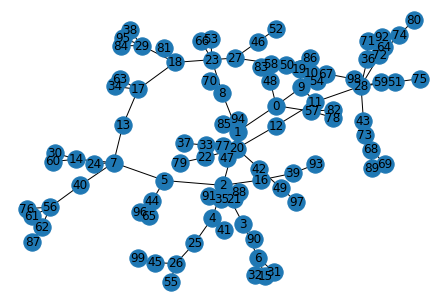

In [187]:
G2 = nx.Graph()
G2.add_edge(0,1)
for i in range(2,100):
    flattern_edges = list(sum(G2.edges(), ()))
    unique_edges = np.unique(flattern_edges)
    random_node = np.random.choice(unique_edges) 
    G2.add_edge(i, random_node) 

nx.draw(G2, with_labels = True)

In [188]:
dict(G2.degree()).values()

dict_values([4, 5, 9, 3, 3, 3, 4, 5, 3, 5, 1, 3, 2, 2, 3, 1, 2, 4, 4, 1, 6, 1, 2, 3, 1, 2, 3, 3, 6, 4, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 2, 1, 2, 3, 3, 2, 2, 1, 3, 2, 3, 2, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [189]:
max(dict(G2.degree()).values())

9

In [190]:
min(dict(G2.degree()).values())

1